In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
from soilgasflux_fcs import json_reader, visualization
from soilgasflux_fcs import hm_model, linear_model

Matplotlib is building the font cache; this may take a moment.


In [3]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt


In [189]:
data_path = pathlib.Path('../data/synthetical/data62/d_start30')

In [190]:

a = json_reader.Initializer(folderPath=data_path)

In [191]:
df = a.prepare_rawdata()


In [202]:
deadband = 30
cutoff = 90

for i in df['id'].unique():
    df_i = df[df['id'] == i]


print('id:', i)
print(df_i['k30_co2'].max(), df_i['k30_co2'].min(), (df_i['k30_co2'][cutoff]-df_i['k30_co2'][deadband])/(cutoff-deadband))

hm = hm_model.HM_model(raw_data=df_i,
                               metadata={'area':314, 'volume':6283})
hm_results = hm.calculate(deadband=deadband, cutoff=cutoff)

id: 2024-11-20_0-21-21
567.3953920163955 428.90784958319534 0.9381403619753712


In [201]:
df_i.columns

Index(['datetime', 'datetime_utc', 'k30_co2', 'bmp_pressure',
       'bmp_temperature', 'si_humidity', 'si_temperature', 'id', 'timedelta'],
      dtype='object')

In [193]:
lm = linear_model.LINEAR_model(raw_data=df_i,
                               metadata={'area':314, 'volume':6283})
lm_results = lm.calculate(deadband=deadband, cutoff=cutoff)

{'parameters_best_fit': {'dcdt': 1.014267913109884, 'c0': 431.10387263666473}}


Visualizer initialized
Plotting HM results
Plotting Linear results


/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/visualization.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/visualization.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  LINEAR_results:
/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/visualization.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


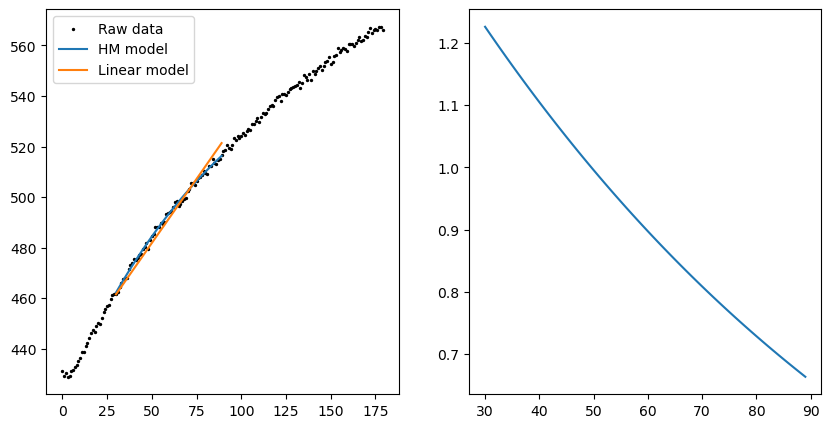

In [203]:
viewer = visualization.Visualizer()
viewer.plot_raw_data(dataframe=df_i)
viewer.plot_hm_results(HM_results=hm_results)
viewer.plot_linear_results(LINEAR_results=lm_results)


In [31]:
a = np.arange(0, 10, 1).reshape(1, 10)

b = np.arange(0, 20, 1).reshape(20,1)
AA, BB = np.meshgrid(a, b)

In [32]:
AA[5,5] = np.array([1,2])

ValueError: setting an array element with a sequence.

In [33]:
AA

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])